In [1]:
import stim 
import random
from stim_baconshor import *

In [165]:
def bacon_shor_circuit(d,p):
    cirq = stim.Circuit()

    # Create the initial qubits - spacial coordinates
    for row in range(d):
        for col in range(d):
            cirq.append("QUBIT_COORDS", d*row + col, (col, row , 0))
            cirq.append("H", d*row + col)

    
    cirq.append("TICK")

    #Measure ZZ checks along rows
    for row in range(d-1):
        for col in range(d):
            cirq.append("MZZ", [d*row + col, d*(row+1) + col]) 
        cirq.append("TICK")
        

    # Measure XX checks along columns
    for col in range(d-1):
        for row in range(d):
            cirq.append("MXX", [d*row + col, d*row + col+1]) 
        cirq.append("TICK")


    # Add Y errors on all qubits with probability p
    for row in range(d):
        for col in range(d):
            if random.random() < p:
                cirq.append("Y_ERROR", d*row + col, p)
    # cirq.append("Y_ERROR", 1, p)


    #Measure ZZ checks along rows
    for row in range(d-1):
        for col in range(d):
            cirq.append("MZZ", [d*row + col, d*(row+1) + col]) 
        cirq.append("TICK")

        cirq.append("DETECTOR", [stim.target_rec(-1),stim.target_rec(-2),stim.target_rec(-3),stim.target_rec(-13),stim.target_rec(-14),stim.target_rec(-15)], arg = (col+0.5,d/2,0))

    
    # Measure XX checks along columns
    for col in range(d-1):
        for row in range(d):
            cirq.append("MXX", [d*row + col, d*row + col+1]) 
        cirq.append("TICK")

        #Add detectors for the X checks
        cirq.append("DETECTOR", [stim.target_rec(-1),stim.target_rec(-2),stim.target_rec(-3),stim.target_rec(-13),stim.target_rec(-14),stim.target_rec(-15)], arg = (col+0.5,d/2,0))


    return cirq

In [2]:
circuit = bacon_shor_circuit(3,0.6)

ValueError: Arg must be a double or sequence of doubles.

In [167]:
circuit

stim.Circuit('''
    QUBIT_COORDS(0, 0, 0) 0
    H 0
    QUBIT_COORDS(1, 0, 0) 1
    H 1
    QUBIT_COORDS(2, 0, 0) 2
    H 2
    QUBIT_COORDS(0, 1, 0) 3
    H 3
    QUBIT_COORDS(1, 1, 0) 4
    H 4
    QUBIT_COORDS(2, 1, 0) 5
    H 5
    QUBIT_COORDS(0, 2, 0) 6
    H 6
    QUBIT_COORDS(1, 2, 0) 7
    H 7
    QUBIT_COORDS(2, 2, 0) 8
    H 8
    TICK
    MZZ 0 3 1 4 2 5
    TICK
    MZZ 3 6 4 7 5 8
    TICK
    MXX 0 1 3 4 6 7
    TICK
    MXX 1 2 4 5 7 8
    TICK
    Y_ERROR(0.6) 0 2 4 7 8
    MZZ 0 3 1 4 2 5
    TICK
    DETECTOR(2.5, 1.5, 0) rec[-1] rec[-2] rec[-3] rec[-13] rec[-14] rec[-15]
    MZZ 3 6 4 7 5 8
    TICK
    DETECTOR(2.5, 1.5, 0) rec[-1] rec[-2] rec[-3] rec[-13] rec[-14] rec[-15]
    MXX 0 1 3 4 6 7
    TICK
    DETECTOR(0.5, 1.5, 0) rec[-1] rec[-2] rec[-3] rec[-13] rec[-14] rec[-15]
    MXX 1 2 4 5 7 8
    TICK
    DETECTOR(1.5, 1.5, 0) rec[-1] rec[-2] rec[-3] rec[-13] rec[-14] rec[-15]
''')

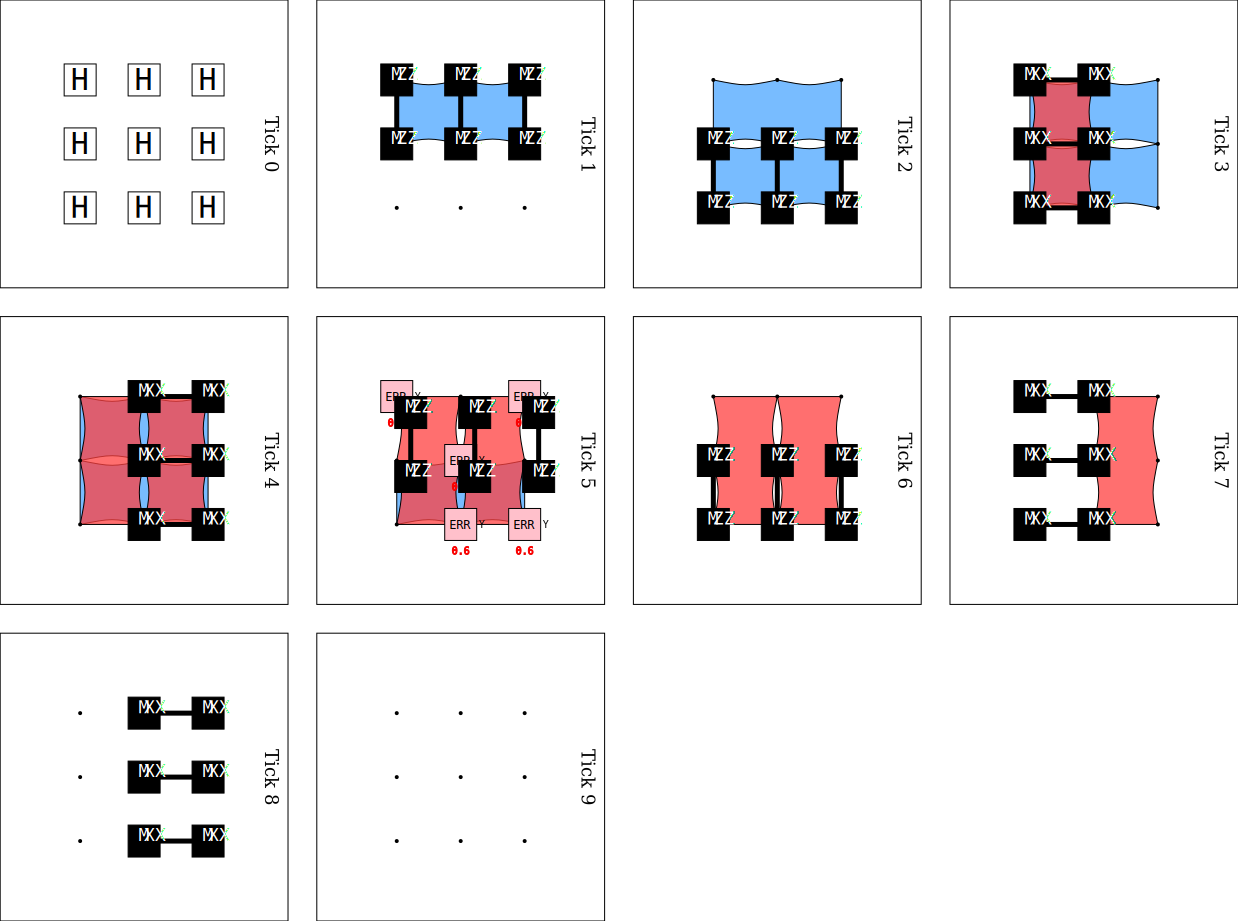

In [168]:
circuit.diagram("detslice-with-ops-svg")

In [171]:
sampler = circuit.compile_detector_sampler()


In [177]:
print(sampler.sample(shots=1))

[[ True False False  True]]
